In [12]:
%pip install tslearn
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans,silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMinMax
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

%pip install pyclustering



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn import datasets, preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import glob
import re

from pyclustering.cluster import gmeans, xmeans
import itertools
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
import platform
from scipy import stats
import itertools

In [3]:
import os
dir = ['graphs','first_check','log','log_check','first_check','exact_data']
for i in range(len(dir)):
    if not os.path.exists(dir[i]):
        os.mkdir(dir[i])

In [4]:
file = 'check_monsakun_log_02.csv'
df = pd.read_csv(file,index_col=0)
df=df.dropna(0)
df2 = df.mean()
# display(df2)
df2.to_csv('check_monsakun_mean_02.csv')

C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4056114110.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df=df.dropna(0)


In [40]:
#　物語戦略
files1= glob.glob('monsakun_log_??.csv')
files2= glob.glob('problems_shobi2017-?.csv')
for num1,file1 in enumerate(files1):
  fnum1 = re.sub(r"\D","",file1)
  print("fnum1=",fnum1)
  fnum2 = fnum1[-1]
  
  
  file2 = 'problems_shobi2017-'+str(fnum2)+'.csv'
  print(file1,file2)
  df1 = pd.read_csv(file1)
  df2 = pd.read_csv(file2)

  df3 = pd.merge(df1,df2,on=['lv','asg','card'],how='left')
  df3['story_st']=0
  df3['relation_st']=0
  df3['formula_st']=0
  # df.loc[(df['stp']==1)&(df['card']==3),'relation_st']=1
  df3.loc[(df3['stp']==1)&(df3['type0']=='r1'),'relation_st']=1
  df3.loc[(df3['stp']==1)&(df3['type0']=='r0'),'relation_st']=1

  for index,row in df3.iterrows():
    if row['stp']==1:
      relation_st = row['relation_st']
    elif row['ope1']!='PROB_BEGIN':
      df3.loc[index,'relation_st']=relation_st

  set_ct = 0
  for index,row in df3.iterrows():
    # print(row['session'],session,row['ope1'],row['check'],row['type2'])
    if row['ope1']=='PROB_BEGIN':
      session = row['session']
      set_ct = 0
      story1 = 0
      story2 = 0
      formula = 0
    if row['session'] == session and row['ope1']=='SET' and row['check']==0:
      # print(index,set_ct,row['type2'],row['slot'])
      set_ct += 1
      # print(set_ct)
      if set_ct == 1 and row['type2'] =='existence' and row['slot']==1:
        story1 += 1
        story2 += 1
      elif set_ct == 2 and row['type2'] in ['increase','decrease'] and row['slot'] == 2:
        story1 += 1
      elif set_ct == 2 and row['type2'] =='existence' and row['slot'] == 2:
        story2 += 1
      elif set_ct == 3 and (row['type2'] in ['combination','comp_more']) and row['slot']==3:
        story2 +=1
      elif set_ct == 3 and (row['type2'] =='existence') and row['slot']==3:
        story1 +=1

      if set_ct == row['formula_order']==row['slot']:
        formula += 1
    if row['session'] == session and row['ope1']=='CHECK':
      if story2 ==3 or story1 == 3:
        # for index,row in df3.iterrows():
        #   if session == row['session']:
        #     df3.loc[index,'story_st']=1
        df3.loc[index,'story_st']=1

      if formula == 3:
        df3.loc[index,'formula_st']= '1'
 
  df3.to_csv('log/monsakun_log_'+str(fnum1)+'_with_type.csv')
  df3['q']=df3['lv'].astype(str).str.cat(df3['asg'].astype(str),sep='_')
  df4 = df3.loc[df3['ope1']=='CHECK']
  df4.to_csv('log_check/monsakun_log_check_r_s'+str(fnum1)+'.csv')
  df4 = df4[df4['check']==1]
  pd.crosstab([df4['relation_st'],df4['story_st']],[df4['q'],df4['jdg']]).to_csv('first_check/r_s_first_check_'+str(fnum1)+'.csv')
  pd.crosstab([df4['relation_st'],df4['story_st']],df4['q'],margins=True).to_csv('first_check/r_s_first_check_no_jdg_'+str(fnum1)+'.csv')
  pd.crosstab([df4['relation_st'],df4['story_st'],df4['formula_st']],df4['q'],margins=True).to_csv('first_check/r_s_f_first_check_no_jdg_'+str(fnum1)+'.csv')
  pd.crosstab([df4['InputID']],df4['q'],margins=True).to_csv('InputID_q_'+str(fnum1)+'.csv')

fnum1= 02
monsakun_log_02.csv problems_shobi2017-2.csv
fnum1= 03
monsakun_log_03.csv problems_shobi2017-3.csv
fnum1= 04
monsakun_log_04.csv problems_shobi2017-4.csv
fnum1= 05
monsakun_log_05.csv problems_shobi2017-5.csv


In [41]:
def remove_any_zero_row(df):
    """一つでも0の行を削除"""
    df = df.copy()
    for row in df.index:
        if (df.loc[row] == 0).any():
            df.drop(row, axis=0, inplace=True)
    return df

In [46]:
import matplotlib.colors as mcolors
import pprint

fnum1= 02
log_check\monsakun_log_check_r_s02.csv InputID_q_02.csv


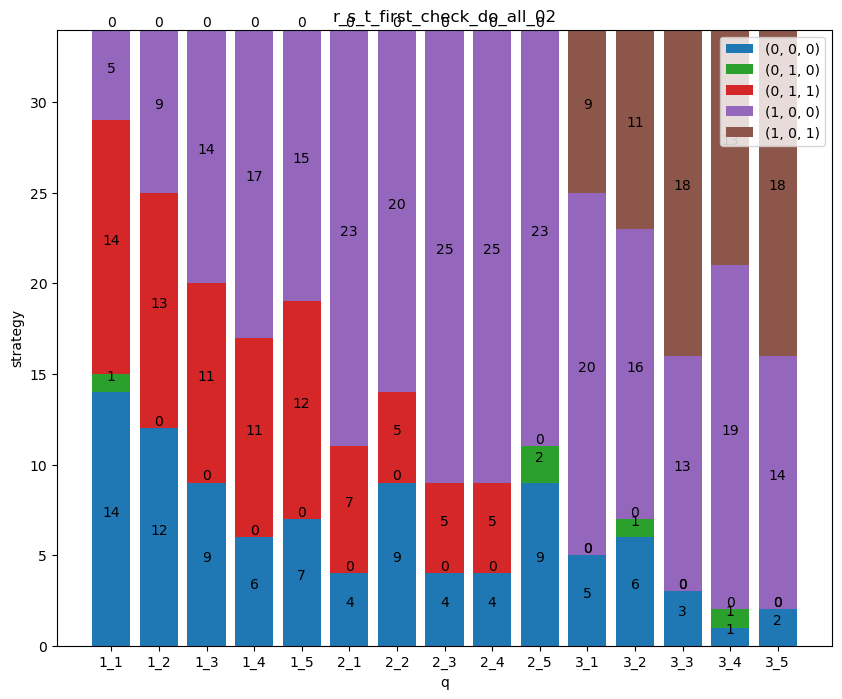

fnum1= 03
log_check\monsakun_log_check_r_s03.csv InputID_q_03.csv


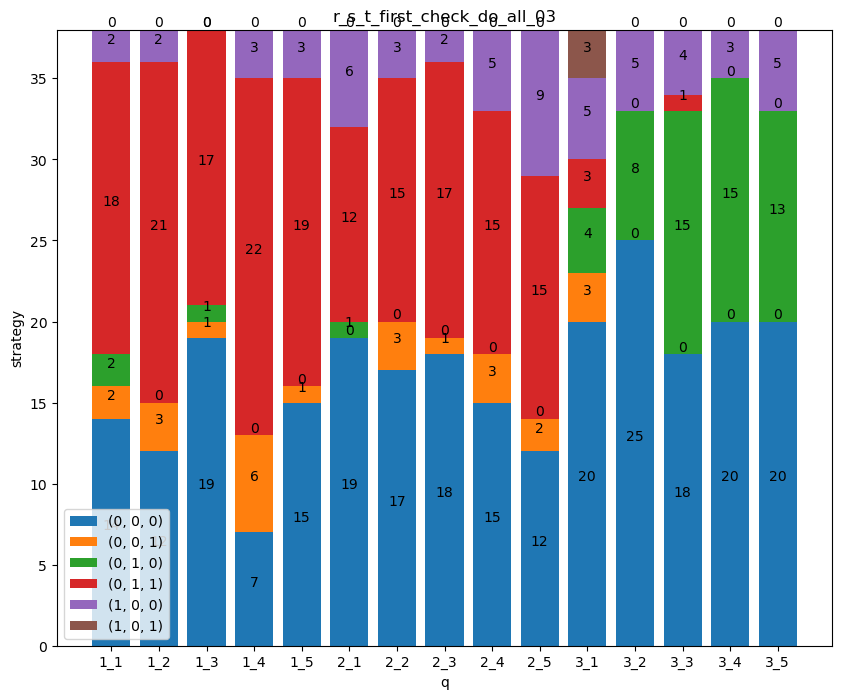

fnum1= 04
log_check\monsakun_log_check_r_s04.csv InputID_q_04.csv


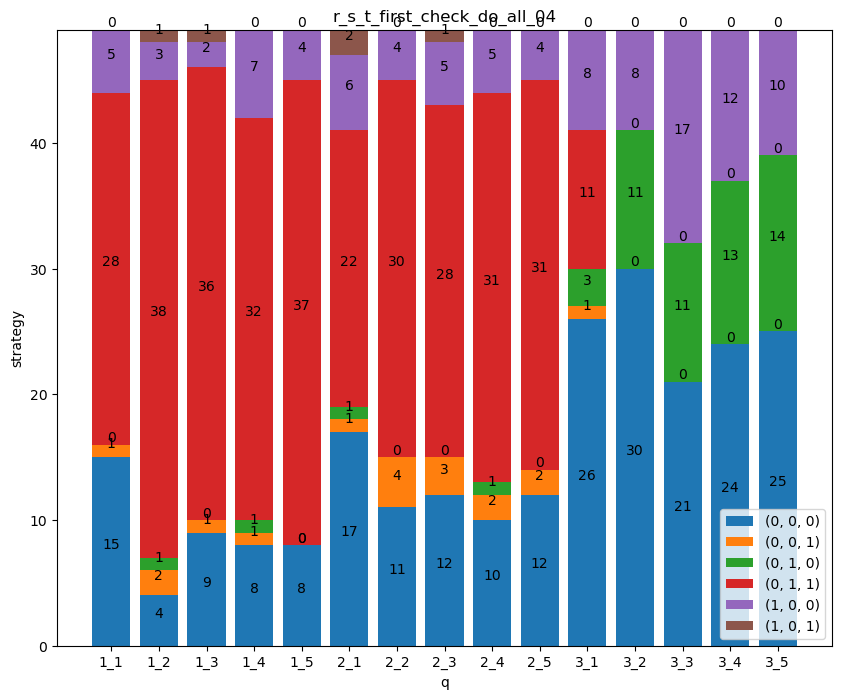

fnum1= 05
log_check\monsakun_log_check_r_s05.csv InputID_q_05.csv


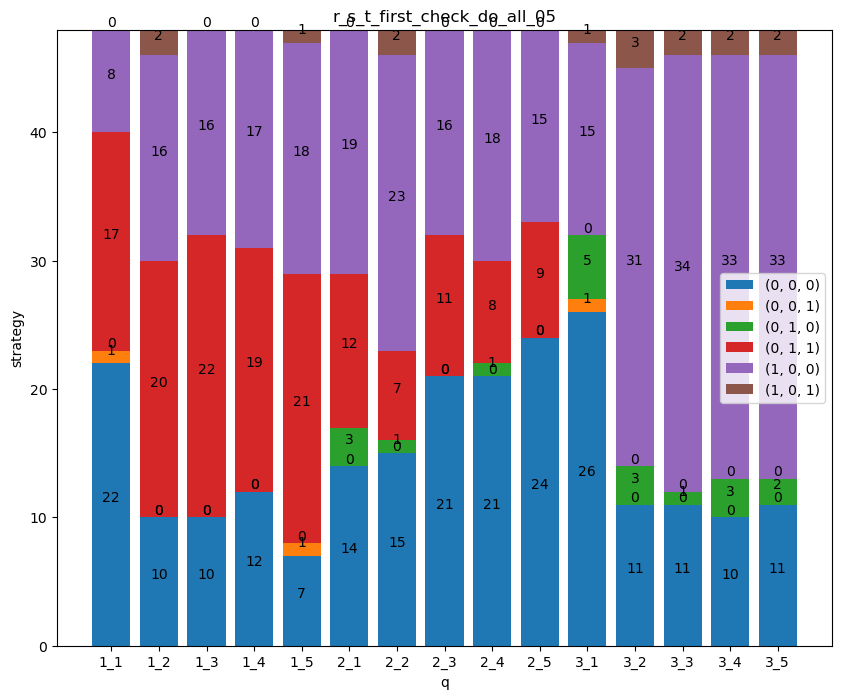

In [48]:
files1= glob.glob('log_check/monsakun_log_check_r_s??.csv')
for num1,file1 in enumerate(files1):
  fnum1 = re.sub(r"\D","",file1)
  print("fnum1=",fnum1)
  fnum2 = fnum1[-1]
  
  
  file2 = 'InputID_q_'+str(fnum1)+'.csv'
  print(file1,file2)
  df1 = pd.read_csv(file1,index_col=0)
  df2 = pd.read_csv(file2)
  df2 = remove_any_zero_row(df2)
  df2 = df2[:-1]
  df2 = df2.drop(columns=['All'])
  df2.to_csv('InputID_q_drop_'+str(fnum1)+'.csv')
  df1 = df1[df1['check']==1]
  df3 = pd.merge(df1,df2['InputID'],on=['InputID'],how='inner')
  df3.to_csv('log_check/log_check_InputID_'+str(fnum1)+'.csv')
  df4 = pd.crosstab([df3['relation_st'],df3['story_st'],df3['formula_st']],df3['q'])
  df4.to_csv('first_check/r_s_f_first_check_do_all_no_sum_'+str(fnum1)+'.csv')
  pd.crosstab([df3['relation_st'],df3['story_st']],df3['q'],margins=True).to_csv('first_check/r_s_f_first_check_do_all_'+str(fnum1)+'.csv')
  fig, ax = plt.subplots(figsize=(10, 8))


  #積み上げ棒グラフ描画
  st_list = [(0,0,0), (0,0,1),(0,1,0), (0,1,1), (1,0,0), (1,0,1)]
  colorlist = mcolors.TABLEAU_COLORS.keys()

  dict_colorlist = dict(zip(st_list,colorlist))

  for i in range(len(df4)):
      ax.bar(df4.columns, df4.iloc[i], bottom=df4.iloc[:i].sum(),color=dict_colorlist[df4.index[i]])
      for j in range(len(df4.columns)):
        plt.text(x=j, 
                 y=df4.iloc[:i, j].sum() + (df4.iloc[i, j] / 2), 
                 s=df4.iloc[i, j], 
                 ha='center', 
                 va='bottom'
                )
  ax.set(xlabel='q', ylabel='strategy')
  ax.legend(df4.index)
  plt.title('r_s_t_first_check_do_all_'+str(fnum1))
  plt.savefig('graphs/r_s_t_first_check_do_all_'+str(fnum1)+'.png')
  plt.show()

直接確率の算出

In [38]:
files = glob.glob('first_check/r_s_f_first_check_do_all_no_sum_??.csv')
e_data = pd.DataFrame(columns = ['郡１','群２','観測値１','観測値２','群1_観測値1','群１観測値２','群２観測値１','群２観測値２','p値'])
for file in files:
  fnum = re.sub(r"\D","",file)
  print(fnum)
  df = pd.read_csv(file,index_col=['relation_st','story_st','formula_st'])
  print(print(len(df.index)))
  df2 = df.index
  df_index = []
  for element in df2:
    element = '_'.join(map(str,element))
    df_index.append(element)
    print(element)
  print(df_index)
  for i in range(len(df)-1):
    for j in range(len(df.columns)-1):
      data = [[df.iloc[i,j],df.iloc[i,j+1]],[df.iloc[i+1,j],df.iloc[i+1,j+1]]]
      # print(data)
      # print(df.index.values[i],df.columns.values[j],stats.fisher_exact(data)[1])
      tmp_se = pd.Series([df_index[i],df_index[i+1],str(df.columns[j]),str(df.columns[j+1]),df.iloc[i,j],df.iloc[i,j+1],df.iloc[i+1,j],df.iloc[i+1,j+1],stats.fisher_exact(data)[1]],index=e_data.columns)
      tmp_seT = tmp_se.T
      e_data = e_data.append(tmp_se,ignore_index=True)
      # e_data = pd.concat([e_data,tmp_se],axis=1)
      # print(list(itertools.chain.from_iterable(data)))
  display(e_data)
  e_data.to_csv('exact_data/exact_data_'+str(fnum)+'.csv')
  # print(df.index[1])

02
5
None
0_0_0
0_1_0
0_1_1
1_0_0
1_0_1
['0_0_0', '0_1_0', '0_1_1', '1_0_0', '1_0_1']


C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=True)
C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=True)
C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=True)
C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=Tr

,郡１,群２,観測値１,観測値２,群１_観測値１,群１観測値２,群２観測値１,群２観測値２,p値
0,0_0_0,0_1_0,1_1,1_2,14,12,1,0,1.000000
1,0_0_0,0_1_0,1_2,1_3,12,9,0,0,1.000000
2,0_0_0,0_1_0,1_3,1_4,9,6,0,0,1.000000
3,0_0_0,0_1_0,1_4,1_5,6,7,0,0,1.000000
4,0_0_0,0_1_0,1_5,2_1,7,4,0,0,1.000000
5,0_0_0,0_1_0,2_1,2_2,4,9,0,0,1.000000
6,0_0_0,0_1_0,2_2,2_3,9,4,0,0,1.000000
7,0_0_0,0_1_0,2_3,2_4,4,4,0,0,1.000000
8,0_0_0,0_1_0,2_4,2_5,4,9,0,2,1.000000
9,0_0_0,0_1_0,2_5,3_1,9,5,2,0,1.000000


03
6
None
0_0_0
0_0_1
0_1_0
0_1_1
1_0_0
1_0_1
['0_0_0', '0_0_1', '0_1_0', '0_1_1', '1_0_0', '1_0_1']


C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=True)
C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=True)
C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=True)
C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=Tr

,郡１,群２,観測値１,観測値２,群１_観測値１,群１観測値２,群２観測値１,群２観測値２,p値
0,0_0_0,0_1_0,1_1,1_2,14,12,1,0,1.000000
1,0_0_0,0_1_0,1_2,1_3,12,9,0,0,1.000000
2,0_0_0,0_1_0,1_3,1_4,9,6,0,0,1.000000
3,0_0_0,0_1_0,1_4,1_5,6,7,0,0,1.000000
4,0_0_0,0_1_0,1_5,2_1,7,4,0,0,1.000000
...,...,...,...,...,...,...,...,...,...
121,1_0_0,1_0_1,2_5,3_1,9,4,0,4,0.029412
122,1_0_0,1_0_1,3_1,3_2,4,5,4,0,0.104895
123,1_0_0,1_0_1,3_2,3_3,5,4,0,0,1.000000
124,1_0_0,1_0_1,3_3,3_4,4,3,0,0,1.000000


C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=True)
C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=True)
C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=True)
C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=Tr

04
6
None
0_0_0
0_0_1
0_1_0
0_1_1
1_0_0
1_0_1
['0_0_0', '0_0_1', '0_1_0', '0_1_1', '1_0_0', '1_0_1']


C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=True)
C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=True)
C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=True)
C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=Tr

,郡１,群２,観測値１,観測値２,群１_観測値１,群１観測値２,群２観測値１,群２観測値２,p値
0,0_0_0,0_1_0,1_1,1_2,14,12,1,0,1.0
1,0_0_0,0_1_0,1_2,1_3,12,9,0,0,1.0
2,0_0_0,0_1_0,1_3,1_4,9,6,0,0,1.0
3,0_0_0,0_1_0,1_4,1_5,6,7,0,0,1.0
4,0_0_0,0_1_0,1_5,2_1,7,4,0,0,1.0
...,...,...,...,...,...,...,...,...,...
191,1_0_0,1_0_1,2_5,3_1,4,8,0,0,1.0
192,1_0_0,1_0_1,3_1,3_2,8,8,0,0,1.0
193,1_0_0,1_0_1,3_2,3_3,8,17,0,0,1.0
194,1_0_0,1_0_1,3_3,3_4,17,12,0,0,1.0


05
6
None
0_0_0
0_0_1
0_1_0
0_1_1
1_0_0
1_0_1
['0_0_0', '0_0_1', '0_1_0', '0_1_1', '1_0_0', '1_0_1']


C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=True)
C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=True)
C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=True)
C:\Users\daich\AppData\Local\Temp\ipykernel_1748\4020169118.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_data = e_data.append(tmp_se,ignore_index=Tr

,郡１,群２,観測値１,観測値２,群１_観測値１,群１観測値２,群２観測値１,群２観測値２,p値
0,0_0_0,0_1_0,1_1,1_2,14,12,1,0,1.000000
1,0_0_0,0_1_0,1_2,1_3,12,9,0,0,1.000000
2,0_0_0,0_1_0,1_3,1_4,9,6,0,0,1.000000
3,0_0_0,0_1_0,1_4,1_5,6,7,0,0,1.000000
4,0_0_0,0_1_0,1_5,2_1,7,4,0,0,1.000000
...,...,...,...,...,...,...,...,...,...
261,1_0_0,1_0_1,2_5,3_1,15,11,0,5,0.043382
262,1_0_0,1_0_1,3_1,3_2,11,21,5,13,0.756767
263,1_0_0,1_0_1,3_2,3_3,21,22,13,14,1.000000
264,1_0_0,1_0_1,3_3,3_4,22,13,14,22,0.058514


In [ ]:
# pd.crosstab([df3['relation_st'],df3['story_st']],[df3['q'],df3['jdg']]).to_csv('r_s_first_check_'+'02')+'.csv')
#新しい列の作成（レベル＿問題番号）
df3['q']=df3['lv'].astype(str).str.cat(df3['asg'].astype(str),sep='_')
df3.loc[df['ope1']=='CHECK'].to_csv('monsakun_log_check_r_s'+str(fnum)+'.csv')
pd.crosstab([df3['relation_st'],df3['story_st']],[df3['q'],df3['jdg']]).to_csv('r_s_first_check_'+'02'+'.csv')


In [ ]:
files= glob.glob('monsakun_log_??_check.csv')
for num,file in enumerate(files):
  fnum = re.sub(r"\D","",file)
  fnum = fnum[:2]
  print("fnum=",fnum)

  df = pd.read_csv(file)
  
  display(df[['lv','check']].groupby('lv').mean())
  # print(df['lv'])

fnum= 04


,check
lv,
1,1.146179
2,1.250000
3,15.467490


fnum= 02


,check
lv,
1,1.149123
2,1.113208
3,2.633898


fnum= 05


,check
lv,
1,1.180000
2,1.593272
3,1.635057


fnum= 03


,check
lv,
1,1.282158
2,1.262097
3,7.938586


In [ ]:
files= glob.glob('monsakun_log_??.csv')
for num,file in enumerate(files):
  fnum = re.sub(r"\D","",file)
  fnum = fnum[:2]
  print("fnum=",fnum)

  df = pd.read_csv(file)
  df['relation_st']=0
  df['story_st']=0
  # display(df)

#関係文の定義
  # if fnum == '02' or fnum == '05':
  #   df.loc[(df['stp']==1)&(df['card']==3),'relation_st']='card_3'
  #   df.loc[(df['stp']==1)&(df['card']==5),'relation_st']='card_5'
  # else:
  #   df.loc[(df['stp']==1)&(df['card']==2),'relation_st']='card_2'
  #   df.loc[(df['stp']==1)&(df['card']==5),'relation_st']='card_5'
  if fnum == '02' or fnum == '05':
    df.loc[(df['stp']==1)&(df['card']==3),'relation_st']=1
    df.loc[(df['stp']==1)&(df['card']==5),'relation_st']=1
  else:
    df.loc[(df['stp']==1)&(df['card']==2),'relation_st']=1
    df.loc[(df['stp']==1)&(df['card']==5),'relation_st']=1

  for index, row in df.iterrows():
    
    if row['ope1']=='CHECK':
      check = 1
    else:
      check = 0
    if row['ope1']=='PROB_BEGIN':
      begin_session = row['session']
      set1 = 0
      set2 = 0
      set3 = 0
      cond1 = 0
      cond2 = 0
      set_ct = 0
    # print('set_ct',set_ct)
    elif row['ope1']=='SET':
      set_ct += 1
      if fnum == '02' or fnum =='05':
        if set_ct == 1 and row['slot1'] not in [0,3,5] and row['slot2'] == 0\
          and row['slot3'] == 0:
          cond1 += 1
          cond2 += 1
        elif set_ct == 2 and row['slot1'] not in [0,3,5] and row['slot2'] not in [0,3,5]\
              and row['slot3'] == 0:
          cond1 += 1
        elif set_ct == 2 and row['slot1'] not in [0,3,5] and row['slot2'] == 5 and \
              row['slot3'] == 0:
          cond2 += 1
        elif set_ct == 3 and row['slot1'] not in [0,3,5] and row['slot2'] ==5 and\
              row['slot3'] not in [0,3,5]:
          cond2 += 1
        elif set_ct ==3 and row['slot1'] not in [0,3,5] and row['slot2'] not in [0,3,5]\
              and row['slot3'] ==3:
          cond1 +=1
        # elif row['slot1'] not in [0,3,5]:
        #   if row['slot2']==5:
        #     if row['slot3'] not in [0,3,5]:
        #       df.loc[index,'story_st']=1
      else:
        if set_ct == 1 and row['slot1'] not in [0,2,5] and row['slot2'] == 0\
          and row['slot3'] == 0:
          cond1 += 1
          cond2 += 1
        elif set_ct == 2 and row['slot1'] not in [0,2,5] and row['slot2'] not in [0,2,5]\
              and row['slot3'] == 0:
          cond1 += 1
        elif set_ct == 2 and row['slot1'] not in [0,2,5] and row['slot2'] == 2 and \
              row['slot3'] == 0:
          cond2 += 1
        elif set_ct == 3 and row['slot1'] not in [0,2,5] and row['slot2'] ==2 and\
              row['slot3'] not in [0,2,5]:
          cond2 += 1
        elif set_ct ==3 and row['slot1'] not in [0,2,5] and row['slot2'] not in [0,2,5]\
              and row['slot3'] ==5:
          cond2 += 1
    elif row['ope1']=='CHECK':
      if cond1 == 3 or cond2 ==3:
        df.loc[index,'story_st']=1

    if row['relation_st']!=0:
      relation_st = row['relation_st']
      session = row['session']
      # print(relation_st)  
      # print(row['session'],session)
    if (row['session']==session):
      if(row['stp']!=1):
        df.loc[index,'relation_st']=relation_st
  df.to_csv('monsakun_log_relation_story_'+str(fnum)+'.csv')
  df.loc[df['ope1']=='CHECK'].to_csv('monsakun_log_check_relation_story_'+str(fnum)+'.csv')

fnum= 03
fnum= 05
fnum= 02
fnum= 04


In [ ]:
# 関係文戦略と物語戦略の比較
files = glob.glob('monsakun_log_check_relation_story_??.csv')
for index,file in enumerate(files):
  fnum = re.sub(r"\D","",file)
  fnum = fnum[:2]
  print("fnum=",fnum)

  df = pd.read_csv(file,index_col=0)
  # df['relation_st'] = 0

  # #関係文の定義
  # if fnum == '02' or fnum == '05':
  #   df.loc[(df['stp']==1)&(df['card']==3),'relation_st']='card_3'
  #   df.loc[(df['stp']==1)&(df['card']==5),'relation_st']='card_5'
  # else:
  #   df.loc[(df['stp']==1)&(df['card']==2),'relation_st']='card_2'
  #   df.loc[(df['stp']==1)&(df['card']==5),'relation_st']='card_5'

  #新しい列の作成（レベル＿問題番号）
  df['q']=df['lv'].astype(str).str.cat(df['asg'].astype(str),sep='_')

  #チェック数１での結果(関係文と物語)
  df2 = df[df['check']==1]
  df2.to_csv('check_1_'+str(fnum)+'.csv')
  pd.crosstab(df2['relation_st'],[df2['q'],df2['jdg']]).to_csv('relation_first_check_'+str(fnum)+'.csv')
  pd.crosstab([df2['relation_st'],df2['story_st']],[df2['q'],df2['jdg']]).to_csv('relation_story_first_check_'+str(fnum)+'.csv')
  pd.pivot_table(df2,index='InputID',columns=['q'],values=['relation_st','story_st']).to_csv('InputID_q_relation_story'+str(fnum)+'.csv')
  pd.crosstab(df2['InputID'],[df2['q']]).to_csv('InputID_q_relation_story'+str(fnum)+'.csv')
  pd.crosstab(df2['relation_st'],df2['q'],margins=True).to_csv('relation_st_per_q_'+str(fnum)+'.csv')

  #戦略ごとのチェック数
  df2 = df[df['jdg']=='s']
  # if index == 0:
  df2.to_csv('relation_st'+str(fnum)+'.csv')


  pd.pivot_table(df2,index='relation_st',columns=['q'],values='check',aggfunc=[np.mean,len]).to_csv('strategy_check_'+str(fnum)+'.csv')
  pd.pivot_table(df2,index='relation_st',columns=['q'],values='stp',aggfunc=[np.mean,len]).to_csv('strategy_step_'+str(fnum)+'.csv')

fnum= 02
fnum= 03
fnum= 05
fnum= 04


In [ ]:
files = glob.glob('monsakun_log_check_relation_story_02.csv')

for index,file in enumerate(files):
  fnum = re.sub(r"\D","",file)
  fnum = fnum[:2]
  print("fnum=",fnum)

  df = pd.read_csv(file,index_col=0)
  df = df[df['check']==1]
  df.to_csv('02.csv')
  df = df.replace({'relation_st':{1:'relation_st'},'story_st':{1:'story_st'}})
  display(df)
  df['strategy']=df['relation_st'].astype(str).str.cat(df['story_st'].astype(str))
  df['q'] = df['lv'].astype(str).str.cat(df['asg'].astype(str),sep='_')
  df = df.replace({'strategy':{'0*':''}},regex=True)
  df = df.replace({'strategy':{'':'0'}},regex=True)
  # print(df)
  pd.crosstab(df['InputID'],[df['q'],df['strategy'],df['jdg']]).to_csv('InputID_relation_story_'+str(fnum)+'.csv')
  # display(df)

fnum= 02


,date,time,ans,InputID,lv,asg,stp,ope1,slot,card,...,jdg,C.S,ST.S,N.S,SS.S,O.S,validity,trial,relation_st,story_st
4,2017/10/09,14:50:55,521,31710071,1,1,3,CHECK,0,0,...,f,0,0,1,1,1,3,1,0,0
14,2017/10/09,14:51:46,321,31710071,1,2,3,CHECK,0,0,...,s,1,1,1,1,1,5,1,0,story_st
19,2017/10/09,14:52:10,321,31710071,1,3,3,CHECK,0,0,...,s,1,1,1,1,1,5,1,0,story_st
24,2017/10/09,14:52:44,321,31710071,1,4,3,CHECK,0,0,...,s,1,1,1,1,1,5,1,relation_st,0
29,2017/10/09,14:53:09,521,31710071,1,5,3,CHECK,0,0,...,f,0,0,1,1,1,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,2017/10/09,15:07:25,213,31710074,3,1,7,CHECK,0,0,...,s,1,1,1,1,1,5,1,relation_st,0
4184,2017/10/09,15:07:39,213,31710074,3,2,3,CHECK,0,0,...,s,1,1,1,1,1,5,1,relation_st,0
4189,2017/10/09,15:07:50,213,31710074,3,3,3,CHECK,0,0,...,s,1,1,1,1,1,5,1,relation_st,0
4196,2017/10/09,15:08:16,213,31710074,3,4,5,CHECK,0,0,...,s,1,1,1,1,1,5,1,relation_st,0


In [ ]:

files = glob.glob('monsakun_log_check_relation_st_??.csv')
for index,file in enumerate(files):
  fnum = re.sub(r"\D","",file)
  fnum = fnum[:2]
  print("fnum=",fnum)

  df = pd.read_csv(file,index_col=0)
  # df['relation_st'] = 0

  # #関係文の定義
  # if fnum == '02' or fnum == '05':
  #   df.loc[(df['stp']==1)&(df['card']==3),'relation_st']='card_3'
  #   df.loc[(df['stp']==1)&(df['card']==5),'relation_st']='card_5'
  # else:
  #   df.loc[(df['stp']==1)&(df['card']==2),'relation_st']='card_2'
  #   df.loc[(df['stp']==1)&(df['card']==5),'relation_st']='card_5'

  #新しい列の作成（レベル＿問題番号）
  df['q']=df['lv'].astype(str).str.cat(df['asg'].astype(str),sep='_')

  #チェック数１での結果
  df2 = df[df['check']==1]
  df2.to_csv('check_1_'+str(fnum)+'.csv')
  pd.crosstab(df2['relation_st'],[df2['q'],df2['jdg']]).to_csv('relation_first_check_'+str(fnum)+'.csv')
  pd.crosstab([df2['relation_st'],df2['story_st']],[df2['q'],df2['jdg']]).to_csv('relation_story_first_check_'+str(fnum)+'.csv')
  pd.pivot_table(df2,index='InputID',columns=['q'],values=['relation_st']).to_csv('InputID_q_'+str(fnum)+'.csv')
  pd.crosstab(df2['relation_st'],df2['q'],margins=True).to_csv('relation_st_per_q_'+str(fnum)+'.csv')

  #戦略ごとのチェック数
  df2 = df[df['jdg']=='s']
  # if index == 0:
  df2.to_csv('relation_st'+str(fnum)+'.csv')


  pd.pivot_table(df2,index='relation_st',columns=['q'],values='check',aggfunc=[np.mean,len]).to_csv('strategy_check_'+str(fnum)+'.csv')
  pd.pivot_table(df2,index='relation_st',columns=['q'],values='stp',aggfunc=[np.mean,len]).to_csv('strategy_step_'+str(fnum)+'.csv')

fnum= 04
fnum= 05
fnum= 03
fnum= 02


In [ ]:
files = glob.glob('relation_st??.csv')
usr = {}
for index,file in enumerate(files):
  fnum = re.sub(r"\D","",file)
  fnum = fnum[:2]
  print("fnum=",fnum)

  df = pd.read_csv(file,index_col=0)

  usr[fnum]=(len(df['InputID'].unique()))
  # usr[fnum]=(df['check'].mean())

usr = sorted(usr.items())
print(usr)


fnum= 05
fnum= 03
fnum= 04
fnum= 02
[('02', 40), ('03', 42), ('04', 56), ('05', 53)]


In [ ]:
files = glob.glob('relation_first_check_??.csv')
for index,file in enumerate(files):
  fnum = re.sub(r"\D","",file)
  fnum = fnum[:2]
  print("fnum=",fnum)
  df=pd.read_csv(file,index_col=0,header=None).T
  df['lv']=df['q'].str[0]
  df['0']=df['0'].astype(float)
  df['1']=df['1'].astype(float)
  df=df.reindex(columns=['lv','jdg','q','0','1'])
  # print(df.dtypes)
  # print(df.groupby(['lv','jdg']).get_group(('1','f')))
  print(df)
  print(df['lv'].value_counts(normalize=True))
  df[['jdg','0','1','lv']].groupby(['lv','jdg']).mean().T.to_csv('relation_first_check_mean_'+str(fnum)+'.csv')

fnum= 04
0  lv jdg    q     0     1
1   1   f  1_1   5.0   1.0
2   1   s  1_1  42.0   6.0
3   1   f  1_2   5.0   3.0
4   1   s  1_2  44.0   2.0
5   1   f  1_3   3.0   1.0
6   1   s  1_3  46.0   4.0
7   1   f  1_4   2.0   0.0
8   1   s  1_4  43.0   9.0
9   1   f  1_5   1.0   0.0
10  1   s  1_5  49.0   4.0
11  2   f  2_1   6.0   3.0
12  2   s  2_1  39.0   6.0
13  2   f  2_2   5.0   0.0
14  2   s  2_2  45.0   4.0
15  2   f  2_3   5.0   3.0
16  2   s  2_3  43.0   3.0
17  2   f  2_4   3.0   1.0
18  2   s  2_4  45.0   5.0
19  2   f  2_5   6.0   0.0
20  2   s  2_5  44.0   4.0
21  3   f  3_1  38.0   5.0
22  3   s  3_1   5.0   3.0
23  3   f  3_2  14.0   5.0
24  3   s  3_2  27.0   5.0
25  3   f  3_3  11.0   8.0
26  3   s  3_3  23.0   9.0
27  3   f  3_4   8.0   1.0
28  3   s  3_4  30.0  12.0
29  3   f  3_5   6.0   2.0
30  3   s  3_5  34.0   9.0
1    0.333333
2    0.333333
3    0.333333
Name: lv, dtype: float64
fnum= 02
0  lv jdg    q     0     1
1   1   f  1_1   8.0   1.0
2   1   s  1_1  25.0   6

In [ ]:
files = glob.glob('relation_first_check_??.csv')
for index,file in enumerate(files):
  fnum = re.sub(r"\D","",file)
  fnum = fnum[:2]
  print("fnum=",fnum)
  df=pd.read_csv(file,index_col=0,header=None).T
  df['lv']=df['q'].str[0]
  df['0']=df['0'].astype(float)
  df['1']=df['1'].astype(float)
  df=df.reindex(columns=['lv','jdg','q','0','1'])
  # print(df.dtypes)
  # print(df.groupby(['lv','jdg']).get_group(('1','f')))
  df['lv']=df['lv']+'_'+df['jdg']
  print(df)
  print(df['lv'].value_counts(normalize=True))
  df[['jdg','0','1','lv']].groupby(['lv',]).sum().T.to_csv('relation_first_check_ratio_'+str(fnum)+'.csv')

fnum= 04
0    lv jdg    q     0     1
1   1_f   f  1_1   5.0   1.0
2   1_s   s  1_1  42.0   6.0
3   1_f   f  1_2   5.0   3.0
4   1_s   s  1_2  44.0   2.0
5   1_f   f  1_3   3.0   1.0
6   1_s   s  1_3  46.0   4.0
7   1_f   f  1_4   2.0   0.0
8   1_s   s  1_4  43.0   9.0
9   1_f   f  1_5   1.0   0.0
10  1_s   s  1_5  49.0   4.0
11  2_f   f  2_1   6.0   3.0
12  2_s   s  2_1  39.0   6.0
13  2_f   f  2_2   5.0   0.0
14  2_s   s  2_2  45.0   4.0
15  2_f   f  2_3   5.0   3.0
16  2_s   s  2_3  43.0   3.0
17  2_f   f  2_4   3.0   1.0
18  2_s   s  2_4  45.0   5.0
19  2_f   f  2_5   6.0   0.0
20  2_s   s  2_5  44.0   4.0
21  3_f   f  3_1  38.0   5.0
22  3_s   s  3_1   5.0   3.0
23  3_f   f  3_2  14.0   5.0
24  3_s   s  3_2  27.0   5.0
25  3_f   f  3_3  11.0   8.0
26  3_s   s  3_3  23.0   9.0
27  3_f   f  3_4   8.0   1.0
28  3_s   s  3_4  30.0  12.0
29  3_f   f  3_5   6.0   2.0
30  3_s   s  3_5  34.0   9.0
1_f    0.166667
1_s    0.166667
2_f    0.166667
2_s    0.166667
3_f    0.166667
3_s    0.166

In [137]:
# !zip -r relation_strategy.zip /content

# from google.colab import files

# files.download("relation_strategy.zip")

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2022.12.05/ (stored 0%)
  adding: content/.config/logs/2022.12.05/14.37.16.591386.log (deflated 54%)
  adding: content/.config/logs/2022.12.05/14.36.51.203185.log (deflated 54%)
  adding: content/.config/logs/2022.12.05/14.36.18.398886.log (deflated 53%)
  adding: content/.config/logs/2022.12.05/14.36.43.534960.log (deflated 86%)
  adding: content/.config/logs/2022.12.05/14.37.17.276212.log (deflated 54%)
  adding: content/.config/logs/2022.12.05/14.35.52.881655.log (deflated 92%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 24%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/.last

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files = glob.glob('monsakun_log_*_check.csv')
for index,file in enumerate(files):
  fnum = re.sub(r"\D","",file)
  fnum = fnum[:2]
  print("fnum=",fnum)

  fname = 'monsakun_log_02_check.csv'
  df = pd.read_csv(file,index_col=0)
  df['relation_st'] = 0

  #関係文の定義
  if fnum == '02' or fnum == '05':
    df.loc[df['slot1']==3,'relation_st'] = 'card_3'
    df.loc[df['slot1']==5,'relation_st'] = 'card_5'
  else:
    df.loc[df['slot1']==2,'relation_st'] = 'card_2'
    df.loc[df['slot1']==5,'relation_st'] = 'card_5'

  #新しい列の作成（レベル＿問題番号）
  df['q']=df['lv'].astype(str).str.cat(df['asg'].astype(str),sep='_')

  #チェック数１での結果
  df2 = df[df['check']==1]

  pd.crosstab(df2['relation_st'],[df2['q'],df2['jdg']]).to_csv('relation_first_check_'+str(fnum)+'.csv')

  #戦略ごとのチェック数
  df2 = df[df['jdg']=='s']
  # if index == 0:
  df2.to_csv('relation_st'+str(fnum)+'.csv')


  pd.pivot_table(df2,index='relation_st',columns=['q'],values='check',aggfunc=[np.mean,len]).to_csv('strategy_check_'+str(fnum)+'.csv')
  pd.pivot_table(df2,index='relation_st',columns=['q'],values='stp',aggfunc=[np.mean,len]).to_csv('strategy_step_'+str(fnum)+'.csv')